In [1]:
import gym
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plot

In [2]:
env_name = 'FrozenLake-v0'
env = gym.make(env_name)

In [3]:
# Converge on an optimal policy using the value function
# Value function is the representation of a particular state
class Agent():
    def __init__(self):
        self.numStates = env.env.nS
        self.numActions = env.env.nA
        self.policy = []
        self.V = [] # State values
        self.listV = []
        self.VIdx = []
        self.listVIdx = []
        self.optimalV = []
        self.plotDiff = []
        self.actionValues = []
        self.iterationNum = 0
        self.optimalPolicy = []
        for i in range(self.numStates):
            self.policy.append(0)
            self.V.append(0)
            self.VIdx.append(0)
        for i in range(self.numActions):
            self.actionValues.append(0)
        
    def valueIteration(self):
        actionValue = 0
        discountFactor = 1
        tempV = []
        tempIdx = []
        while True:
            # Number of states from env
            diff = 0
            for state in range(self.numStates):
                for i in range(self.numActions):
                    self.actionValues.append(0)
                for action in range(self.numActions):            
                    # Given outcomes as a result of probability, we have to loop for those number of outcomes
                    outcomes = len(env.env.P[state][action])
                    actionValue = 0
                    for outcome in range(outcomes):
                        # At each state, we have actions to be taken, and the reward and probability of that action are returned
                        (p, n, r, d) = env.env.P[state][action][outcome]
                        actionValue += p*(r + discountFactor*self.V[n])
                    self.actionValues[action] = actionValue    
                    
                # After the state values have been computed for a particular state and its action outcomes
                idx = maxIndex(self.actionValues)
                diff = max(diff, abs(self.actionValues[idx] - self.V[state]))
                self.V[state] = self.actionValues[idx]
                self.VIdx[state] = idx
                
                # Set policy as the index of the chosen action to be later used in step
                self.policy[state] = idx
            
            self.plotDiff.append(diff)
            self.iterationNum += 1
            tempV = self.V.copy()
            tempIdx = self.VIdx.copy()
            self.listV.append(tempV)
            self.listVIdx.append(tempIdx)
            
            self.optimalV.append(max(self.V))
            # Termination
            if diff < .0001:
                break
            

In [4]:
def maxIndex(l):
    maxVal = max(l)
    maxValIndex = l.index(maxVal)
    return maxValIndex

def setZeros(l, len):
    for i in range(len):
        l.append(0)

In [5]:
def plotV(agent):
    fig, ax = plot.subplots()
    y1 = agent.plotDiff
    n1 = len(y1)
    x1 = np.arange(1, n1+1)
    
    ax.plot(x1,y1, label="V")

    ax.set_xlabel("Iterations")
    ax.set_ylabel("Vk - Vk-1")
    ax.set_title("Value Iteration: Convergence")

    plot.legend()
    plot.show()

In [6]:
def plotOptimalValueFunction(agent, optimalPolicy):
    
    fig1, ax1 = plot.subplots()
#     fig2, ax2 = plot.subplots()
    
    y1 = agent.V
    n1 = len(y1)
    x1 = np.arange(1, n1+1)
        
    y2 = optimalPolicy
    n2 = len(y2)
    x2 = np.arange(1, n2+1)
    
    ax1.plot(x1,y1, label="Optimal Value Function")

    ax1.set_xlabel("States")
    ax1.set_ylabel("Optimal")
    ax1.set_title("Value Iteration: Optimal")

    ax1.scatter(x2,y2, label="Optimal Policy")

#     ax2.set_xlabel("State")
#     ax2.set_ylabel("Optimal Policy")
#     ax2.set_title("Optimal Policy")
    
    plot.legend()
    plot.show()
    
    

In [7]:
# Take an action in each state, and then follow the policy based on the state
def optimalQFunction(agent, policy, V, s, a):
        discountFactor = 1
            
        oldActionValues = []
        oldStateValues = []
        newStateValues = []
        setZeros(newStateValues, agent.numStates)
        setZeros(oldStateValues, agent.numStates)
        setZeros(oldActionValues, agent.numActions)
        
        takeAction = True
        
        for state in range(agent.numStates):
            # Get the highest value from the action values
            i = 0
            for action in range(agent.numActions):
                outcomes = len(env.env.P[state][action])
                actionValue = 0
                for outcome in range(outcomes):
                    (p, n, r, d) = env.env.P[state][action][outcome]
                    actionValue += p*(r + discountFactor*V[n])
                oldActionValues[action] = actionValue # An action gets a particular value
                if(state == s and takeAction):
                    action = a
                    takeAction = False
                    newStateValues[state] = oldActionValues[action]
                else:
                    newStateValues[state] = oldActionValues[policy[state]]
        
        return newStateValues

In [8]:
def computeOptimalPolicy(agent):
    optimalPolicy = []
    row = len(agent.listV)
    col = len(agent.listV[0])
    max = 0
    idxi = 0
    idxj = 0
    
    for i in range(col):
        tempVals = []
        max = 0
        for j in range(row):
            if(agent.listV[j][i] > max):
                idxj = j
                idxi = i
                max = agent.listV[j][i]
       
        optimalPolicy.append(agent.listVIdx[idxj][idxi])
        
    return optimalPolicy

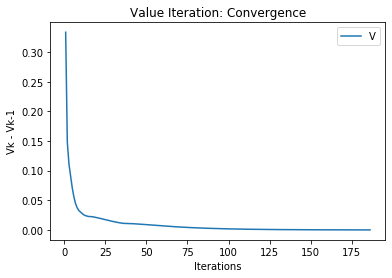

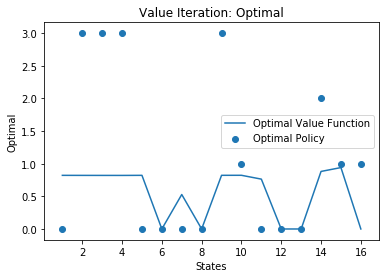

Optimal Value Function [0.8218214467475029, 0.8212610875344288, 0.8208716321171922, 0.8206734669198803, 0.8219932526868285, 0.0, 0.5282471490264042, 0.0, 0.8222623137426365, 0.8226073254619161, 0.7638978485105411, 0.0, 0.0, 0.8817120813954368, 0.9408503841462466, 0.0]

Optimal Policy:  [0, 3, 3, 3, 0, 0, 0, 0, 3, 1, 0, 0, 0, 2, 1, 1]

Optimal Q Function:  [0.8218787153939447, 0.8213180554663746, 0.8209353955238337, 0.8207395219856508, 0.8220256710589893, 0.0, 0.5282564935425778, 0.0, 0.8222876306304603, 0.8226240812162047, 0.7639016195448556, 0.0, 0.0, 0.8817232636678664, 0.9408541551805609, 0.0]

SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFF

In [9]:
# Main
agent = Agent()
agent.valueIteration()
env.reset()
state = 0
done = 0
plotV(agent)
optimalPolicy = computeOptimalPolicy(agent)

plotOptimalValueFunction(agent, optimalPolicy)

print("Optimal Value Function", agent.V)

print()

print("Optimal Policy: ", optimalPolicy)

optimalQ = [ 0 ]

for s in range (agent.numStates):
    for a in range (agent.numActions):
        foundQ = optimalQFunction(agent, optimalPolicy, agent.V, s, a)
        if( sum(optimalQ) < sum(foundQ) ):
            optimalQ = foundQ.copy()

print()
print("Optimal Q Function: ", optimalQ)


while not done:
    env.render()
    nstate, reward, done, e = env.env.step(optimalPolicy[state])
    state = nstate

env.render()